In [ ]:
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window

# Spark Session
- Sem o SparkSession, sua aplicação spark não consegue rodar.
- Cria o SparkContext e SparkConfig
---
Anatomia spark: https://luminousmen.com/post/spark-anatomy-of-spark-application

In [ ]:
spark = (SparkSession.builder 
        .master("local[*]") 
        .appName("workshop_spark")
        .getOrCreate())

## Spark UI

Monitoramento da aplicação Spark, funciona através de lisseners. Habilitado por padrão, mas pode ser desabilitado através de configuração.

Visualização de DAGs, timeline, jobs, stages e tasks.

---
Artigo Databricks: https://databricks.com/blog/2015/06/22/understanding-your-spark-application-through-visualization.html
Documentação: https://spark.apache.org/docs/3.0.0-preview2/web-ui.html

### Conhecendo os dados
---
Leitura de csv: https://sparkbyexamples.com/spark/spark-read-csv-file-into-dataframe/

## Plano de Execução
Lineage dos dados

### Transformação
Operações de transformações criam um novo DataFrame a partir de um Dataframe base.
São cahamdas "lazy" por não ser executadas naquele momento (ficam no plano de ação)
Tipos de transformações:
    - narrow: não precisam de dados de outras partições. Ex.: map
    - wide: precisam de shuffle (ler dados de outras partições) Ex.: groupby, join

### Ação
Operações que precisam avaliar o dataframe como um todo (show, count, write).
Nesse momento spark executa o plano de ação

## Join

## Broadcast
Broadcast faz com que os valores sejam salvos em memória (se não tiver memporia suficiente, vai pro disco), para todos os executores que irão precisar desses dados.
Pode ser utilizado para joins entre tabelas grandes com tabelas relativamente pequenas.

Essa estratégia de join já é utilizada quando o tamanho de uma das tabelas fica aboixo da configuração spark.sql.autoBroadcastJoinThreshold

A função é lazy

---
Exemplos: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/content/spark-sql-joins-broadcast.html
Hint: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/content/spark-sql-hint-framework.html

## Particionamento

Particionamento é a principal unidade de paralelismo no Apache Spark. Cada partição é enviada para workers.

A importância de particionar bem:
- Partição de menos: Não utiliza bem os recursos do cluster
- Partições de mais: Introduz overhead no gerenciamento de muitas partições

Como fazer?:
- coalesce() para diminuir o número de partições.
- repartition() para aumentar.

Caso de particionamento por chave de negócio
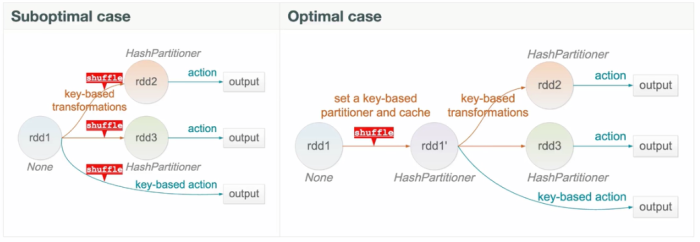

---
Entendendo partições: https://luminousmen.com/post/spark-partitions
Entendendo partições2: https://techmagie.wordpress.com/2015/12/19/understanding-spark-partitioning/
Tunning: https://luminousmen.com/post/spark-tips-partition-tuning

## Window

---
Exemplo com imagem: https://databricks.com/blog/2015/07/15/introducing-window-functions-in-spark-sql.html 

## Cache
Pode ser usado quando um dataframe é utilizado várias vezes.

Caching is beneficial when we use particular RDD several times (and can slow down our calculations otherwise where the whole lineage graph will be processed several times).

O dataset fica em memória (ou também em disco) em todos os workers, cada nó persistindo sua partição e reutilizando em ações aplicadas naquele dataset

É equivalente ao método persist, com valor MEMORY_AND_DISK como localização.

Caching salva o data lineage, sendo útil caso seja necessário reconstruir os dados da base, caso algum nó do cluster caia.
 
Exemplo de count em dado com diferentes métodos de cache (fonte: https://towardsdatascience.com/apache-spark-caching-603154173c48):
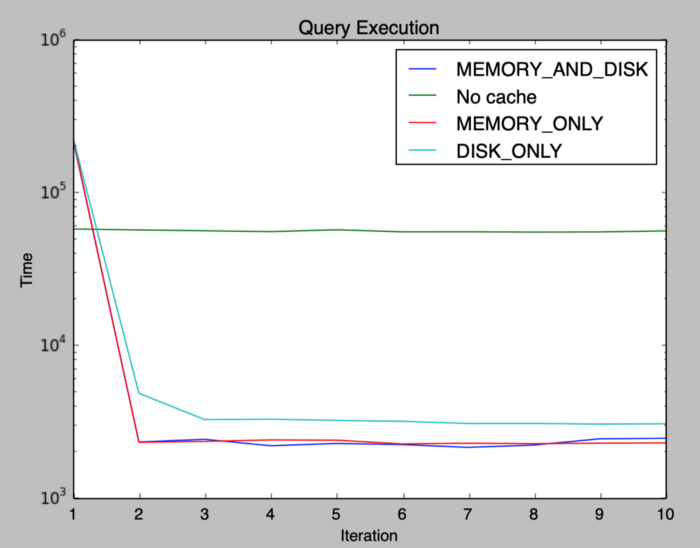


## Checkpoint

Salva checkpoint do Dataframe em disco, no diretório configurados em spark.sparkContext.setCheckpointDir().
Não mantém o plano de excução. O que pode ser ruim caso algum nó caia.

Broadcast vs cache
https://livebook.manning.com/book/spark-in-action-second-edition/16-cache-and-checkpoint-enhancing-spark-s-performances/v-14/22

Pode ser "lazy" ou "eager".

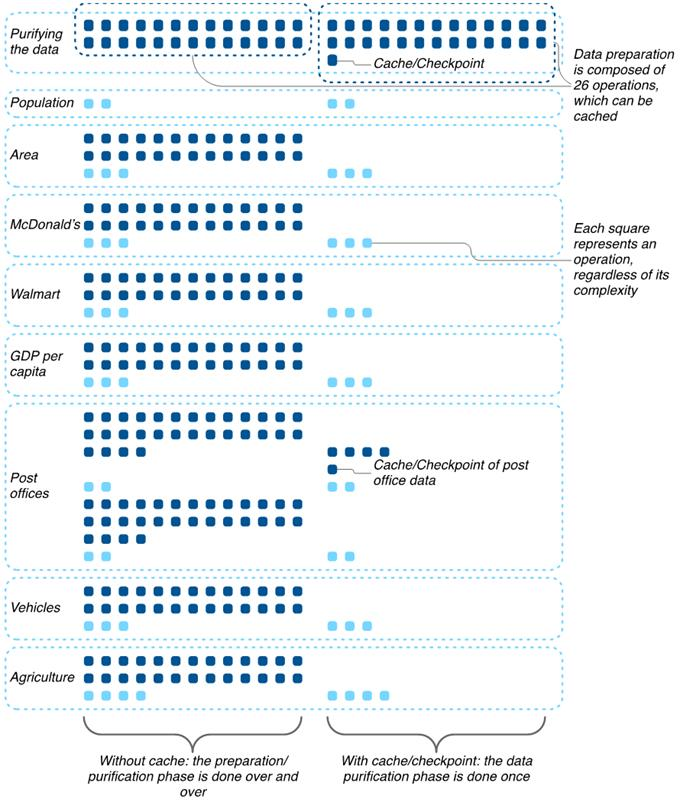

---
Artigo: https://medium.com/@adrianchang/apache-spark-checkpointing-ebd2ec065371

## UDF

## Nulls e NaNs
---
Doc: https://spark.apache.org/docs/3.0.0-preview/sql-ref-nan-semantics.html


## Analises extra

## Referências

- https://luminousmen.com/post/hadoop-yarn-spark
- https://luminousmen.com/post/spark-tips-dataframe-api
- https://sparkbyexamples.com/
- https://spark.apache.org/docs/3.0.0-preview2/web-ui.html
- https://www.youtube.com/watch?v=daXEp4HmS-E&feature=youtu.be
- https://spark.apache.org/docs/latest/sql-performance-tuning.html
- https://databricks.com/blog/2015/07/15/introducing-window-functions-in-spark-sql.html
- https://spark.apache.org/docs/3.0.0-preview/sql-ref-nan-semantics.html
- https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html
- https://www.tutorialdocs.com/article/spark-memory-management.html
- https://blog.scottlogic.com/2018/03/22/apache-spark-performance.html